In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage

In [2]:
# Create a larger 2D array (224x224) to represent a DEM with multiple sinks/depressions
np.random.seed(42)  # Set seed for reproducibility

# Generate a base DEM with random elevation values between 80 and 150
large_dem_array = np.random.randint(80, 150, size=(224, 224))

# Introduce some local minima (sinks/depressions) with varying depths
# Create several depressions by setting lower values at specific locations
for _ in range(20):  # Introduce 20 sinks
    x, y = np.random.randint(0, 224, size=2)  # Random coordinates
    depth = np.random.randint(30, 70)  # Random depth for the sink
    large_dem_array[x, y] = depth  # Set the value to a lower elevation

# Ensure there are some clusters of sinks (simulate deeper depressions)
for _ in range(5):  # Create 5 clusters of depressions
    cluster_x, cluster_y = np.random.randint(0, 224, size=2)
    for i in range(-2, 3):
        for j in range(-2, 3):
            if 0 <= cluster_x + i < 224 and 0 <= cluster_y + j < 224:
                large_dem_array[cluster_x + i, cluster_y + j] = np.random.randint(40, 60)

In [2]:
# Start with a smoother base DEM using a gradient pattern
x = np.linspace(-5, 5, 224)
y = np.linspace(-5, 5, 224)
xv, yv = np.meshgrid(x, y)

# Create a base smooth surface using a Gaussian-like hill pattern
base_dem = 100 + 30 * np.exp(-0.1 * (xv**2 + yv**2))

# Convert to a 2D array representing elevations
large_dem_array_smooth = base_dem.copy()

# Introduce several bowl-shaped sinks with smoother transitions
for _ in range(10):  # Create 10 smooth depressions
    center_x, center_y = np.random.randint(20, 204, size=2)
    radius = np.random.randint(5, 15)  # Random radius for each depression
    depth = np.random.randint(10, 30)  # Random depth for the sink

    for i in range(-radius, radius + 1):
        for j in range(-radius, radius + 1):
            distance = np.sqrt(i**2 + j**2)
            if distance <= radius:
                sink_value = depth * (1 - distance / radius)  # Smooth transition to the sink center
                if 0 <= center_x + i < 224 and 0 <= center_y + j < 224:
                    large_dem_array_smooth[center_x + i, center_y + j] -= sink_value

# Apply a Gaussian filter to smooth out the overall surface and transitions
large_dem_array_smooth = scipy.ndimage.gaussian_filter(large_dem_array_smooth, sigma=3)

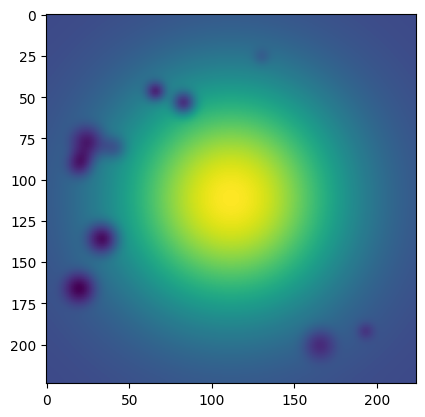

In [3]:
plt.imshow(large_dem_array_smooth)
plt.show()